In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIdata")

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


In [2]:
os.getenv('PUIDATA')

'/nfshome/ml6506/PUIdata'

In [3]:
os.environ['PUI2018'] = '/nfshome/ml6506/PUI2018'

In [4]:
os.getenv('PUI2018')

'/nfshome/ml6506/PUI2018'

# IDEA:
People born after 1980 are more likely to use CITIbike on weekend than people born before 1980.

# Null Hypothesis:
People born after 1980 are less likely to use CITIbike on weenkend than people born before 1980 or same as people born before 1980.
# Alternative hypothesis:
 People born after 1980 are more likely to use CITIbike on weekend than people born before 1980.
# I will use a significance level  $\alpha=0.05$

which means i want the probability of getting a result at least as significant as mine to be less then 5%

I am starting with a single month of data: reading data from citibikecsv file from Jan 2016

# Interpretation of the Z value
if Z < -1.96 or Z > 1.96, then reject Null Hypothesis. Otherwise, we can't reject Null Hypothesis

In [5]:
# Download Jan 201601 DATA
datestring = '201601'
getCitiBikeCSV(datestring)

('Downloading', '201601')
file in place, you can continue


In [6]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [7]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [8]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [9]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [10]:
df.head()

,birth year,date
0,1958.0,2016-01-01 00:00:41
1,1969.0,2016-01-01 00:00:45
2,1982.0,2016-01-01 00:00:48
3,1961.0,2016-01-01 00:01:06
4,1952.0,2016-01-01 00:01:12


In [11]:
df[df['birth year']<1980]

,birth year,date
0,1958.0,2016-01-01 00:00:41
1,1969.0,2016-01-01 00:00:45
3,1961.0,2016-01-01 00:01:06
4,1952.0,2016-01-01 00:01:12
6,1963.0,2016-01-01 00:01:27
8,1963.0,2016-01-01 00:03:12
9,1971.0,2016-01-01 00:03:43
10,1970.0,2016-01-01 00:04:43
12,1964.0,2016-01-01 00:05:41
13,1976.0,2016-01-01 00:06:35


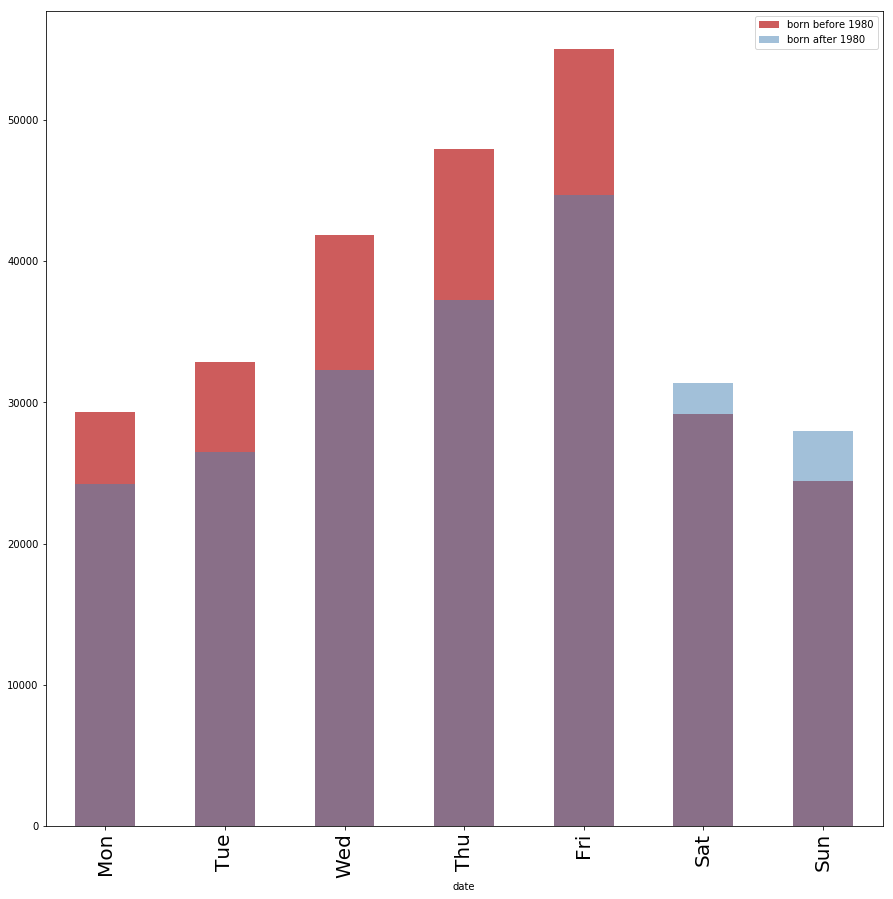

In [12]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
# if 'birth year' < 1980.0 :
#    by==1
# else:
#    by==2

((df['date'][df['birth year']<1980].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='born before 1980')

norm_m = 1
ax = ((df['date'][df['birth year']>=1980].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='born after 1980')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

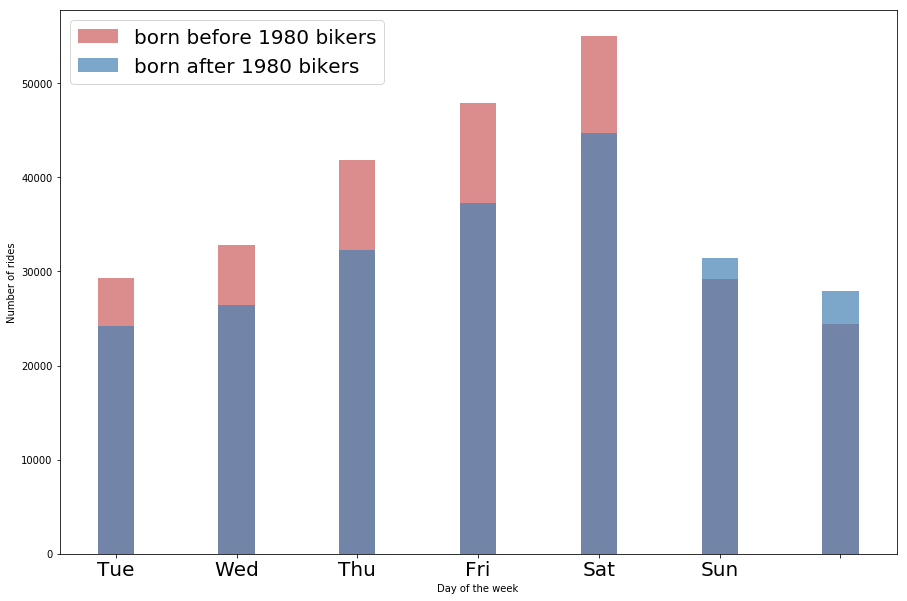

In [13]:
fig,ax=plt.subplots(figsize=(15,10))

counts_w = df[df['birth year']<1980].groupby([df.date.dt.weekday]).count()['date']
norm_w = 1
error_w = np.sqrt(counts_w)
#ax.plot(counts_w, kind="bar",color='IndianRed', label='born before 1980 bikers')
p1 = plt.bar(range(len(counts_w)), counts_w, 0.3, color='IndianRed', label='born before 1980 bikers', alpha = 0.7)

counts_m = df.date[df['birth year'] >= 1980].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
p2 = plt.bar(range(len(counts_m)), counts_m, 0.3, color='SteelBlue', label='born after 1980 bikers', alpha = 0.7)

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(handles = [p1, p2],fontsize=20)
#pl.legend(['born before 1980 bikers','born after 1980 bikers'],fontsize=20)

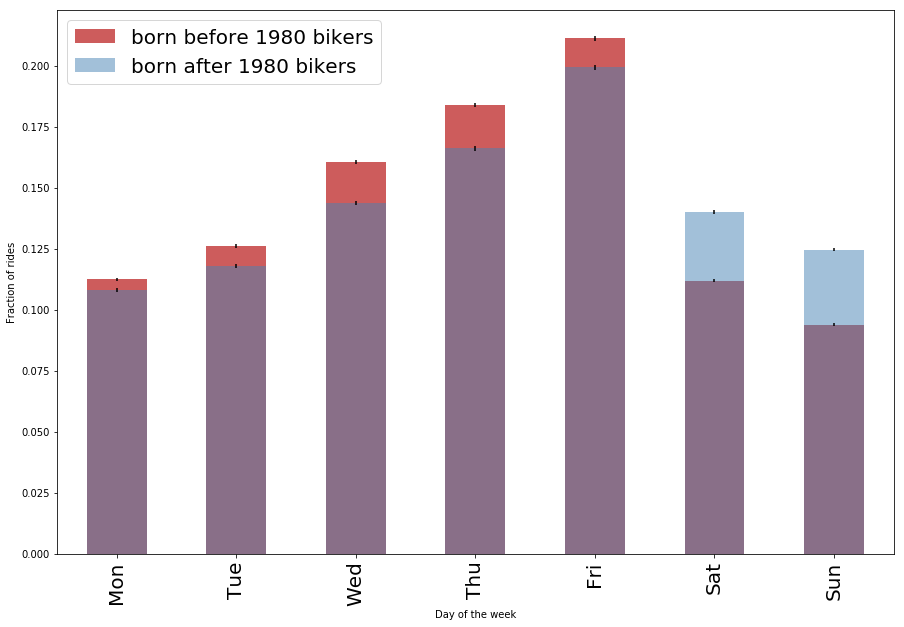

In [14]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='born before 1980 bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='born after 1980 bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['born before 1980 bikers','born after 1980 bikers'],fontsize=20)

# Set up the test of proportions

I need the fraction of people who born after 1980 that bikes during the weekdays and the fraction that bikes during weekends, and the same for men

born after 1980 bikers: week:0.735, weekend:0.265, weekend error:0.002, weekend error:0.001
born before 1980 bikers: week:0.794, weekend:0.206, weekend error:0.002, weekend error:0.001


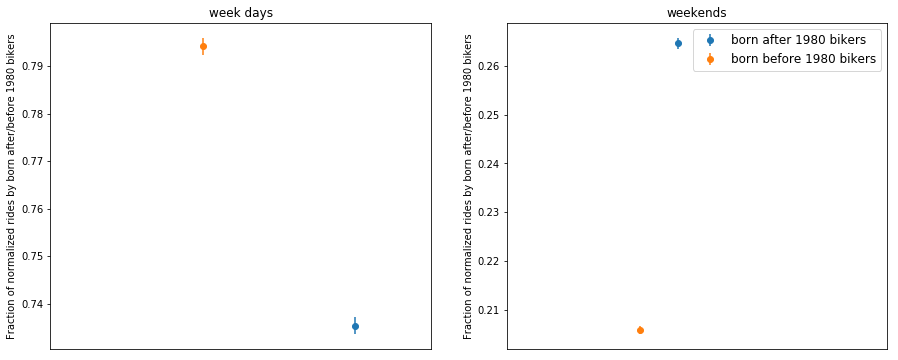

In [37]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_w = sum(counts_w[:-2]) * 1.0 / norm_w  #fraction of women riding on week days
weekend_w = sum(counts_w[-2:]) * 1.0 / norm_w  #fraction of women riding on weekends
eweek_w = np.sqrt(sum(error_w[:-2]**2)) / norm_w  #error on fraction number of women riding on week days
eweekend_w = np.sqrt(sum(error_w[-2:]**2)) / norm_w #error on fraction number of women riding on weekends

#same nomenclature as above
week_m = sum(counts_m[:-2]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m = np.sqrt(sum(error_m[:-2]**2)) / norm_m
eweekend_m = np.sqrt(sum(error_m[-2:]**2)) / norm_m

print("born after 1980 bikers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("born before 1980 bikers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))

ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='born after 1980 bikers')
ax1.errorbar([0.2], [week_w], yerr=[eweek_w], fmt='o', label='born before 1980 bikers')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='born after 1980 bikers')
ax2.errorbar([0.2], [weekend_w], yerr=[eweekend_w], fmt='o', label='born before 1980 bikers')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by born after/before 1980 bikers")
ax1.set_ylabel("Fraction of normalized rides by born after/before 1980 bikers")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 12)

## Figure 3: Fraction of Citibike bikers born/after 1980 for week days (left) and weekends (right)

### Are People born after 1980 more likely to use CITIbike on weekend than people born before 1980?

### The statistics is:

$p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$ 

$SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$

and in this notation¶

$p_0 = \frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}}$

and
$p_1 = \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}}$

In [16]:
P0mP1 = weekend_w - weekend_m
print ("difference between people born before 1980 and after 1980 on weekend: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between people born before 1980 and after 1980 on weekend:  -0.0588581335205
In accordance with Null Hypothesis


### Is this difference statistically significant?

In [17]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_w, weekend_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z = zscore(weekend_w, weekend_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is -48.34


In [18]:
if abs(z) > 1.96:
    print('reject the Null Hypothesis')
else:
    print('can not reject the Null Hypothesis')

reject the Null Hypothesis


### In this case, we can reject Null Hypothesis, which means People born after 1980 are more likely to use CITIbike on weekend than people born before 1980.

#  Check the robustness of your answer with another citibike dataset (unless you used all of the data at once!)

## Lets see if our test holds in the summer, when people clothes may get less in the way to riding

### notice that it is not very pythonic to just copy and paste code as I am doing here! Everything that needs to be done more than once should be done in a function. Why? Because that way if I make any changes I do not run the risk to forget to make the change in one of the spots! (Also it helps readability)

In [19]:
datestring = '201506'
getCitiBikeCSV(datestring)

('Downloading', '201506')
file in place, you can continue


In [20]:
os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv'
#201506-citibike-tripdata.csv

'/nfshome/ml6506/PUIdata/201506-citibike-tripdata.csv'

In [21]:
df_06 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [22]:
df_06['date'] = pd.to_datetime(df_06.starttime)
df_06.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00


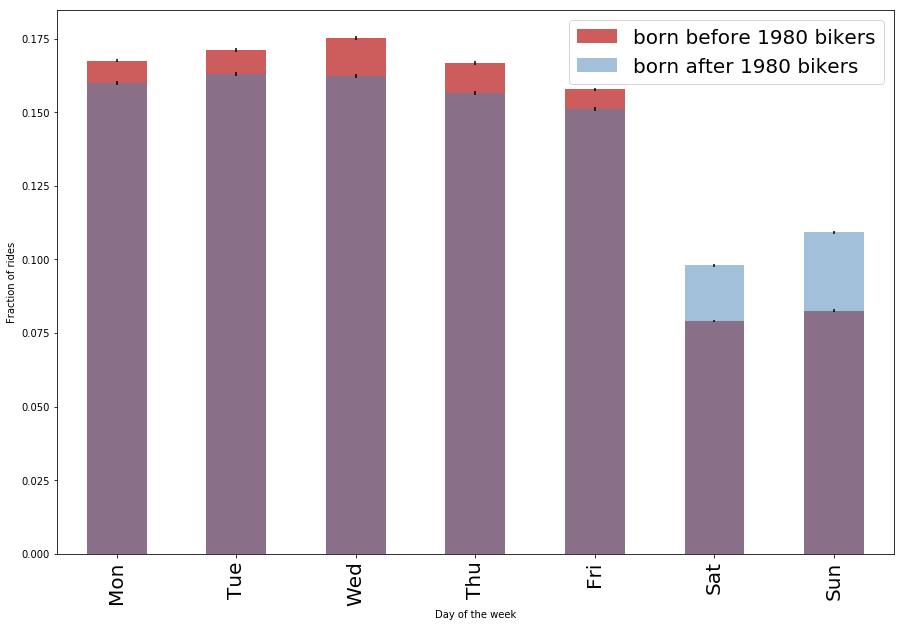

In [34]:
fig=pl.figure(figsize(15,10))

counts_w06 = df_06.date[df_06['birth year']<1980].groupby([df_06.date.dt.weekday]).count()
norm_w06 = counts_w06.sum()
error_w06 = np.sqrt(counts_w06)

((counts_w06) / norm_w06).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w06) / norm_w06, (error_w06) / norm_w06)], label='born before 1980 bikers, June')

counts_m06 = df_06.date[df_06['birth year']>= 1980].groupby([df_06.date.dt.weekday]).count()
norm_m06 = counts_m06.sum()
error_m06 = np.sqrt(counts_m06)
ax =((counts_m06) / norm_m06).plot(kind="bar",color='SteelBlue', alpha=0.5, yerr=[
            ((error_m06) / norm_m06, (error_m06) / norm_m06)], label='born after 1980 bikers, June')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")


pl.legend(['born before 1980 bikers','born after 1980 bikers'],fontsize=20)

### Figure 4: Distribution of Citibike bikers by born after/before 1980 bikers in June 2016, normalized

'born after 1980 bikers: week:0.793, weekend:0.207, weekend error:0.001, weekend error:0.001
'born before 1980 bikers: week:0.838, weekend:0.162, weekend error:0.001, weekend error:0.001
The z statistics is -48.34


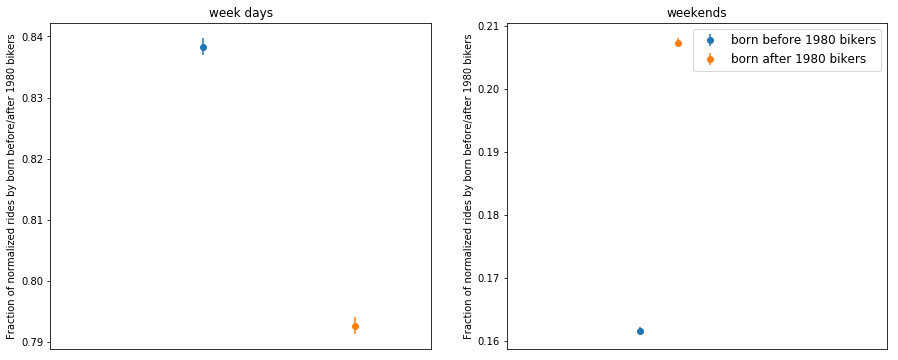

In [38]:
fig=pl.figure(figsize(15,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_w06 = sum(counts_w06[:-2]) * 1.0 / norm_w06
weekend_w06 = sum(counts_w06[-2:])*1.0 / norm_w06
eweek_w06 = np.sqrt(sum(error_w06[:-2]**2)) / norm_w06
eweekend_w06 = np.sqrt(sum(error_w06[-2:]**2)) / norm_w06

week_m06 = sum(counts_m06[:-2]) * 1.0 / norm_m06
weekend_m06 = sum(counts_m06[-2:]) * 1.0 / norm_m06
eweek_m06 = np.sqrt(sum(error_m06[:-2]**2)) / norm_m06
eweekend_m06 = np.sqrt(sum(error_m06[-2:]**2)) / norm_m06

print("'born after 1980 bikers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m06, weekend_m06, eweek_m06, eweekend_m06))
print("'born before 1980 bikers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w06, weekend_w06, eweek_w06, eweekend_w06))

ax1.errorbar([0.2],[week_w06], yerr=[eweek_w06], fmt='o', label='born before 1980 bikers')
ax1.errorbar([0.4],[week_m06], yerr=[eweek_m06], fmt='o', label='born after 1980 bikers')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_w06], yerr=[eweekend_w06], fmt='o', label='born before 1980 bikers')
ax2.errorbar([0.4],[weekend_m06], yerr=[eweekend_m06], fmt='o', label='born after 1980 bikers')
ax1.set_xlim(0,0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by born before/after 1980 bikers")
ax1.set_ylabel("Fraction of normalized rides by born before/after 1980 bikers")

pl.xlim(-0.5,1.5)
pl.legend(fontsize=12)


sp_stdev_mw06 = se(p(weekend_w06, weekend_m06, norm_w06, norm_m06), norm_w06, norm_m06)
# print (sp_stdev_mw)
z06 = zscore(weekend_w06, weekend_m06, sp_stdev_mw06)
print ("The z statistics is %.2f"%z)

In [36]:
if abs(z) > 1.96:
    print('reject the Null Hypothesis')
else:
    print('can not reject the Null Hypothesis')

reject the Null Hypothesis


### In this case, we can reject Null Hypothesis, which means based on 2015/6 data, People born after 1980 are more likely to use CITIbike on weekend than people born before 1980.